# Rainfall Weather Forecasting Project

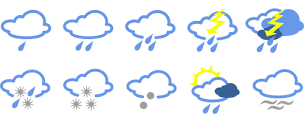

Dataset  

    Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change. This Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia.
 

Input features

    Date  - The date of observation
    Location  -The common name of the location of the weather station
    MinTemp  -The minimum temperature in degrees celsius
    MaxTemp -The maximum temperature in degrees celsius
    Rainfall  -The amount of rainfall recorded for the day in mm
    Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
    Sunshine  -The number of hours of bright sunshine in the day.
    WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
    WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
    WindDir9am -Direction of the wind at 9am
    WindDir3pm -Direction of the wind at 3pm
    WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
    WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
    Humidity9am -Humidity (percent) at 9am
    Humidity3pm -Humidity (percent) at 3pm
    Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
    Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
    Cloud9am - Fraction of sky obscured by cloud at 9am. 
    Cloud3pm -Fraction of sky obscured by cloud 
    Temp9am-Temperature (degrees C) at 9am
    Temp3pm -Temperature (degrees C) at 3pm




Output label  
    
    RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk"..
    

Aim: 
 
    a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow (Classification problem).
    b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there(Regression problem).

In [83]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [84]:
# load the dataset

rain=pd.read_csv(r"https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv")

rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data pre-processing, Feature Engineering & EDA

In [85]:
# create a copy of original dataset for cleaning and analysis

rain_df=rain.copy()

In [86]:
rain_df.shape

(8425, 23)

In [87]:
# check for duplicates

duplicates=rain_df.duplicated()

print('No. of duplicates in the dataset: ', rain_df.duplicated().sum())
print('Index of duplicates in the dataset: ', rain_df[duplicates].index)

No. of duplicates in the dataset:  1663
Index of duplicates in the dataset:  Index([3674, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683,
       ...
       6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147],
      dtype='int64', length=1663)


In [88]:
# remove duplicates

remove_dups=rain_df.drop_duplicates(inplace=True)
print(f'Number of duplicates in the dataset after removal: {remove_dups}')

Number of duplicates in the dataset after removal: None


In [89]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6762 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6762 non-null   object 
 1   Location       6762 non-null   object 
 2   MinTemp        6692 non-null   float64
 3   MaxTemp        6705 non-null   float64
 4   Rainfall       6624 non-null   float64
 5   Evaporation    3841 non-null   float64
 6   Sunshine       3526 non-null   float64
 7   WindGustDir    5820 non-null   object 
 8   WindGustSpeed  5820 non-null   float64
 9   WindDir9am     5968 non-null   object 
 10  WindDir3pm     6468 non-null   object 
 11  WindSpeed9am   6699 non-null   float64
 12  WindSpeed3pm   6662 non-null   float64
 13  Humidity9am    6708 non-null   float64
 14  Humidity3pm    6666 non-null   float64
 15  Pressure9am    5454 non-null   float64
 16  Pressure3pm    5451 non-null   float64
 17  Cloud9am       4896 non-null   float64
 18  Cloud3pm     

In [90]:
# check number of unique values in each column

unique=rain_df.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
Date,3004
Location,12
MinTemp,285
MaxTemp,331
Rainfall,250
Evaporation,116
Sunshine,140
WindGustDir,16
WindGustSpeed,52
WindDir9am,16


In [91]:
# take the count of each unique value in each column

for i in rain_df.columns:
    print(rain_df.value_counts(rain_df[i]),'\n')

Date
2011-06-07    4
2011-05-09    4
2011-05-01    4
2011-05-02    4
2011-05-03    4
             ..
2016-01-31    1
2016-02-01    1
2016-02-02    1
2016-02-03    1
2013-04-10    1
Name: count, Length: 3004, dtype: int64 

Location
PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: count, dtype: int64 

MinTemp
 13.2    58
 12.0    57
 12.7    53
 14.8    53
 10.8    52
         ..
 1.4      1
 25.9     1
-0.8      1
 0.3      1
 28.5     1
Name: count, Length: 285, dtype: int64 

MaxTemp
19.0    66
19.8    62
23.8    54
25.0    54
22.3    54
        ..
39.3     1
39.4     1
39.5     1
39.7     1
45.5     1
Name: count, Length: 331, dtype: int64 

Rainfall
0.0      4334
0.2       321
0.4       144
0.6        87
1.2        69
         ... 
35.8        1
6.3         1
35.2        1
34

Observation:

    Majority rainfall data is from PerthAirport location in Australia
    Rainfall was 0.0mm in 4334 observations
    Number of hours of bright sunshine was 0 in 119 observations
    

In [92]:
# change datatype of 'date' to 'datetime'

rain_df['Date']=pd.to_datetime(rain_df['Date'])

In [93]:
rain_df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,6762,6692.000000,6705.000000,6624.000000,3841.000000,3526.000000,5820.000000,6699.000000,6662.000000,6708.000000,6666.000000,5454.000000,5451.000000,4896.000000,4860.000000,6711.000000,6670.000000
mean,2012-07-18 16:05:44.986690304,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561
min,2008-12-01 00:00:00,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,2010-08-15 00:00:00,9.000000,19.500000,0.000000,2.600000,5.400000,30.000000,6.000000,9.000000,56.000000,38.000000,1013.100000,1010.300000,1.000000,1.000000,13.800000,18.300000
50%,2012-03-05 00:00:00,13.200000,23.500000,0.000000,4.600000,9.000000,37.000000,11.000000,17.000000,68.000000,50.000000,1017.600000,1015.100000,5.000000,5.000000,18.000000,22.100000
75%,2014-07-07 00:00:00,17.500000,28.400000,0.800000,7.000000,10.800000,48.000000,19.000000,24.000000,81.000000,63.000000,1022.200000,1019.600000,7.000000,7.000000,22.200000,26.800000
max,2017-06-25 00:00:00,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000
std,NaN,5.569574,6.156128,10.591418,4.436790,3.785883,14.418577,9.833499,9.620043,17.251733,18.631086,6.712043,6.646755,2.908324,2.740519,5.744117,6.012896


Observation:

    Min temp recorded ranged from -2 to 28.5°C
    Max temp recorded ranged from 8.2 to 45.5°C
    Average rainfall is 2.78mm
    Class A pan evaporation (mm) in the 24 hours ranged from 0-145mm
    Average of 7.89hrs of sunshine was recieved
    
    The mean~ median in all columns except for 'rainfall' which indicates that it deviates from the normal distribution. We can analyse this in further steps

In [95]:
# generate year, month, day columns from 'date' column

rain_df['date'],rain_df['month'],rain_df['year']=rain_df['Date'].dt.day, rain_df['Date'].dt.month,rain_df['Date'].dt.year
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,month,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


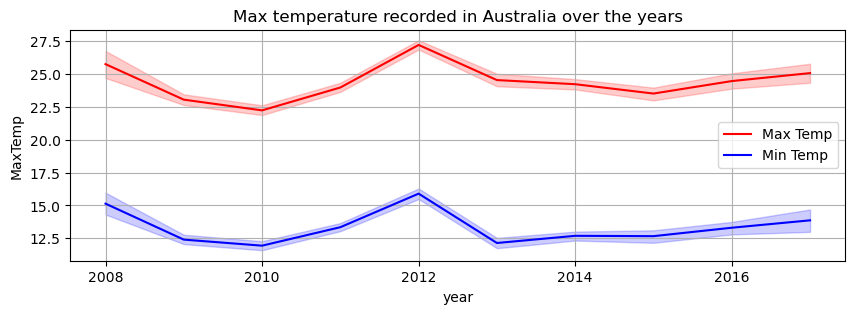

In [96]:
plt.figure(figsize=(10,3))
sns.lineplot(x='year',y='MaxTemp',data=rain_df,color='red',label='Max Temp')
sns.lineplot(x='year',y='MinTemp',data=rain_df,color='blue',label='Min Temp')
plt.title('Max temperature recorded in Australia over the years')
plt.grid(True)
plt.show()

In [97]:
# filter out data for the year with max and min temp

maxt=rain_df[rain_df['year']==2012]
mint=rain_df[rain_df['year']==2010]

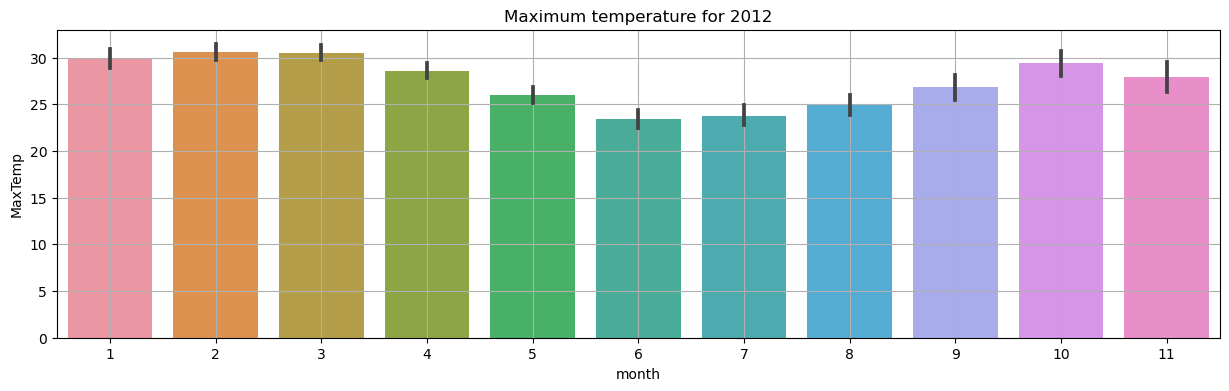

In [98]:
plt.figure(figsize=(15,4))
sns.barplot(x='month',y='MaxTemp',data=maxt)
plt.title('Maximum temperature for 2012')
plt.grid(True)
plt.show()

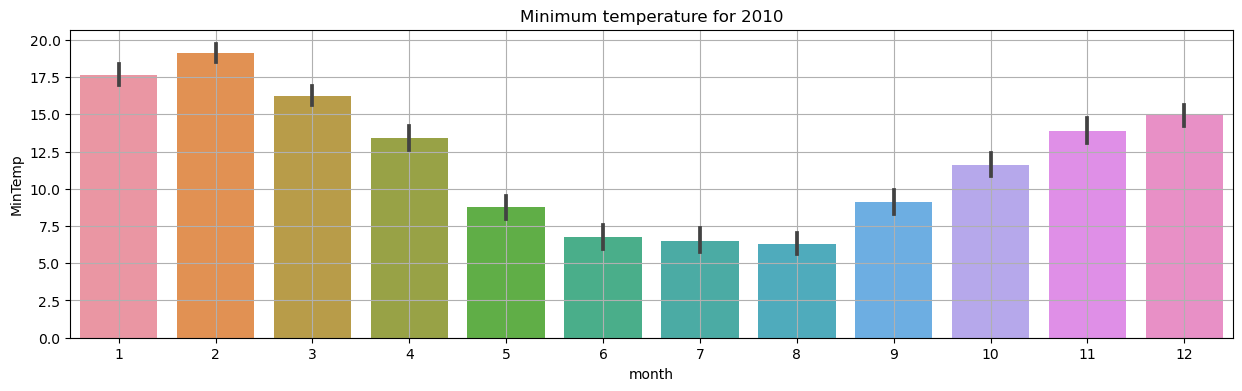

In [99]:
plt.figure(figsize=(15,4))
sns.barplot(x='month',y='MinTemp',data=mint)
plt.title('Minimum temperature for 2010')
plt.grid(True)
plt.show()

Observation:

    Over the years, maximum temperature was recorded on February and March of 2012 and minimum on August 2010

In [100]:
rain_df[rain_df["MaxTemp"]==rain_df["MaxTemp"].max()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,month,year
3302,2017-02-11,Williamtown,25.0,45.5,0.0,NaN,NaN,SSW,43.0,WSW,...,1002.6,NaN,NaN,27.3,43.9,No,No,11,2,2017


In [101]:
rain_df[rain_df["MinTemp"]==rain_df["MinTemp"].min()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,month,year
192,2009-06-11,Albury,-2.0,9.6,0.0,NaN,NaN,SE,13.0,NaN,...,1023.0,NaN,1.0,2.2,8.8,No,No,11,6,2009
560,2010-06-14,Albury,-2.0,13.2,0.0,NaN,NaN,ESE,17.0,NaN,...,1032.0,NaN,6.0,2.2,12.6,No,No,14,6,2010


Observation:    
    
    Highest temp was recorded in 2017-02-11 at Williamtown [45.5°C] with no rainfall  
    Lowest temp was recorded in June of 2009 and 2010 at Albury [-2.0°C] with no rainfall

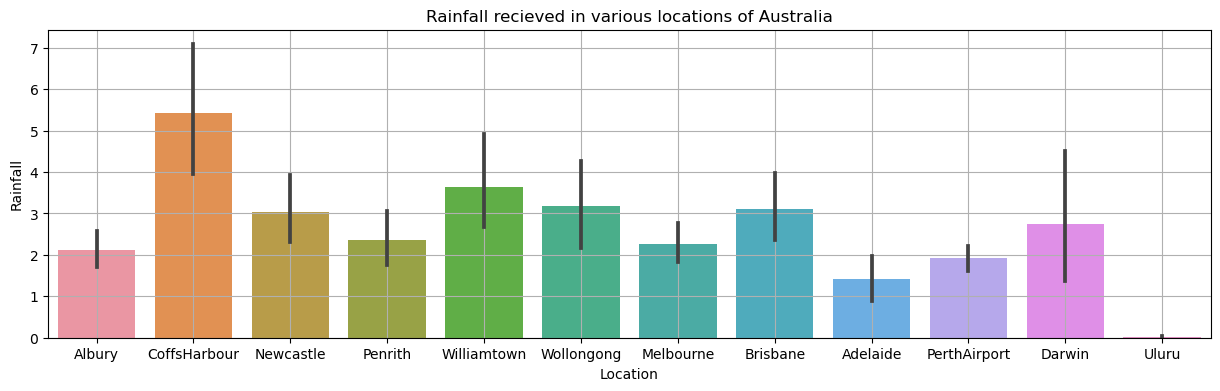

In [102]:
plt.figure(figsize=(15,4))
sns.barplot(x='Location',y='Rainfall',data=rain_df)
plt.title('Rainfall recieved in various locations of Australia')
plt.grid(True)
plt.show()

In [133]:
rain_df[rain_df["Rainfall"]==rain_df["Rainfall"].max()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,month,year
1149,2009-11-07,CoffsHarbour,17.4,23.1,371.0,NaN,3.5,NaN,NaN,SW,...,1025.9,8.0,5.0,18.6,22.0,Yes,Yes,7,11,2009


In [129]:
rain_df["Rainfall"].min()

0.0

Observation:    
    
    Highest Rainfall was recorded in 2009-11-07 at CoffsHarbour [45.5°C] with 371 mm rainfall  
    Lowest Rainfall [0.0 mm] was recorded in Uluru

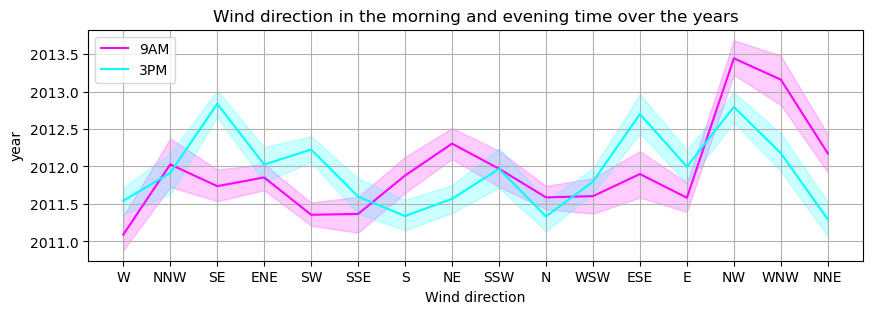

In [115]:
plt.figure(figsize=(10,3))

sns.lineplot(y='year',x='WindDir9am',data=rain_df,color='magenta',label='9AM')
sns.lineplot(y='year',x='WindDir3pm',data=rain_df,color='cyan',label='3PM')
plt.title('Wind direction in the morning and evening time over the years')
plt.xlabel('Wind direction')
plt.grid(True)
plt.show()

Observation:    
    
    Common wind direction in the morning is to the north-west.
    Common wind directions in the evening is to the south-east, north-west and east-southeast.

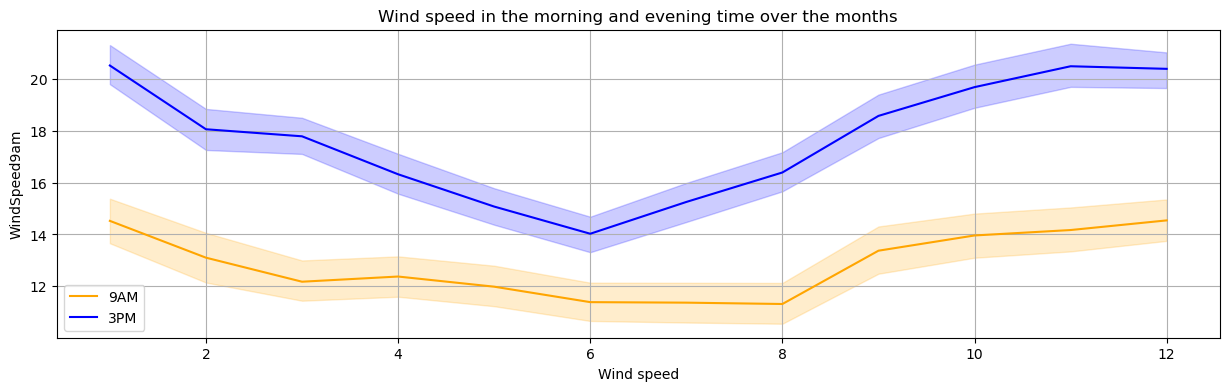

In [117]:
plt.figure(figsize=(15,4))
sns.lineplot(x='month',y='WindSpeed9am',data=rain_df,color='orange',label='9AM')
sns.lineplot(x='month',y='WindSpeed3pm',data=rain_df,color='blue',label='3PM')
plt.title('Wind speed in the morning and evening time over the months')
plt.xlabel('Wind speed')
plt.grid(True)
plt.show()

In [122]:
print(f'Highest wind speed in the morning recorded was {rain_df["WindSpeed9am"].max()} km/hr and evening was {rain_df["WindSpeed3pm"].max()}km/hr')

Highest wind speed in the morning recorded was 63.0 km/hr and evening was 83.0km/hr


In [123]:
print(f'Lowest wind speed in the morning recorded was {rain_df["WindSpeed9am"].min()} km/hr and evening was {rain_df["WindSpeed3pm"].min()}km/hr')

Lowest wind speed in the morning recorded was 0.0 km/hr and evening was 0.0km/hr


Observation:    
    
    Wind speed is highest in the evening than in the morning time.
    Wind speed is high during Nov, Dec and Jan
    Wind speed is low during June
    Highest wind speed in the morning recorded was 63.0 km/hr and evening was 83.0km/hr
    Lowest wind speed recorded was 0.0 km/hr in morning and evening

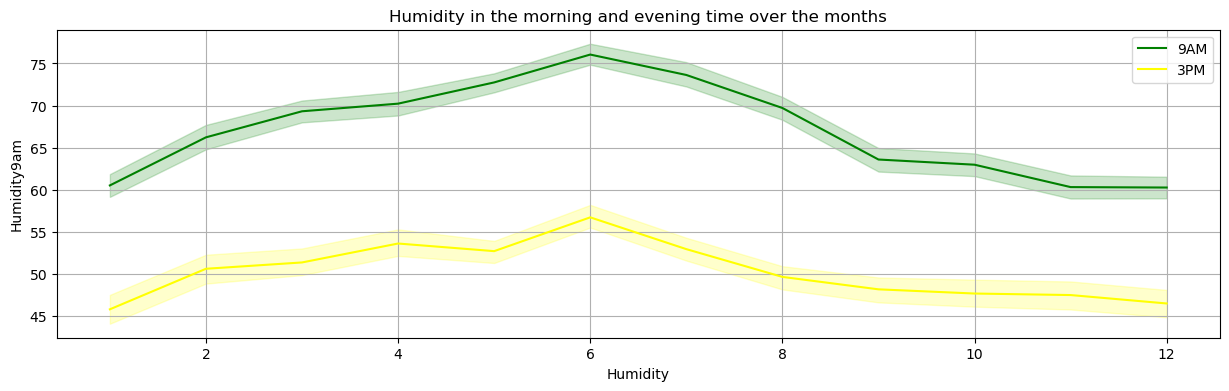

In [125]:
plt.figure(figsize=(15,4))
sns.lineplot(x='month',y='Humidity9am',data=rain_df,color='green',label='9AM')
sns.lineplot(x='month',y='Humidity3pm',data=rain_df,color='yellow',label='3PM')
plt.title('Humidity in the morning and evening time over the months')
plt.xlabel('Humidity')
plt.grid(True)
plt.show()

In [128]:
print(f'Highest Humidity in the morning recorded was {rain_df["Humidity9am"].max()} % and evening was {rain_df["Humidity3pm"].max()}%')
print(f'Lowest Humidity in the morning recorded was {rain_df["Humidity9am"].min()} % and evening was {rain_df["Humidity3pm"].min()}%')

Highest Humidity in the morning recorded was 100.0 % and evening was 99.0%
Lowest Humidity in the morning recorded was 10.0 % and evening was 6.0%


Observation:    
    
    Humidity is highest in the morning than in the evening time.
    Humidity is high during June and low during Dec-Jan
    Highest Humidity in the morning recorded was 100.0 % and evening was 99.0%
    Lowest Humidity in the morning recorded was 10.0 % and evening was 6.0%

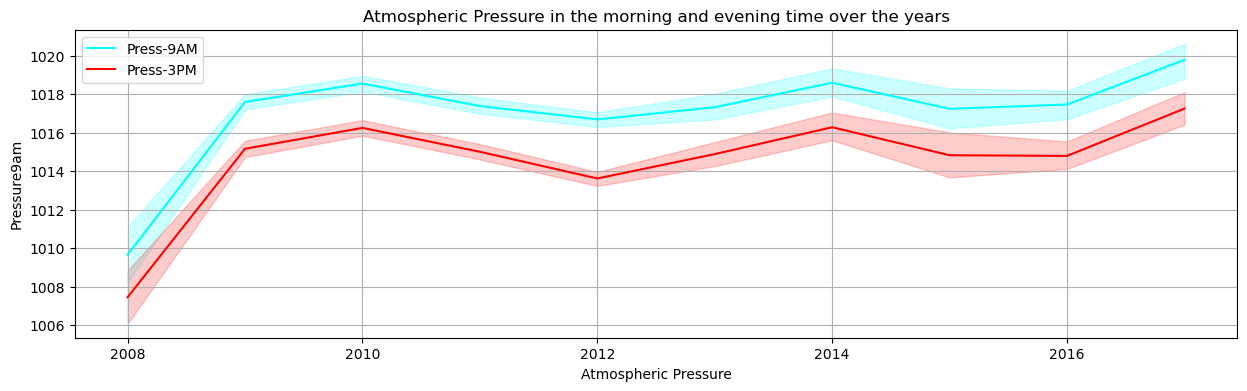

In [139]:
plt.figure(figsize=(15,4))

sns.lineplot(x='year',y='Pressure9am',data=rain_df,color='cyan',label='Press-9AM')
sns.lineplot(x='year',y='Pressure3pm',data=rain_df,color='red',label='Press-3PM')

plt.title('Atmospheric Pressure in the morning and evening time over the years')
plt.xlabel('Atmospheric Pressure')
plt.grid(True)
plt.show()

In [140]:
print(f'Highest Atmospheric Pressurein the morning recorded was {rain_df["Pressure9am"].max()} hpa and evening was {rain_df["Pressure9am"].max()}hpa')
print(f'Lowest Atmospheric Pressure in the morning recorded was {rain_df["Pressure3pm"].min()} hpa and evening was {rain_df["Pressure3pm"].min()}hpa')

Highest Atmospheric Pressurein the morning recorded was 1039.0 hpa and evening was 1039.0hpa
Lowest Atmospheric Pressure in the morning recorded was 982.9 hpa and evening was 982.9hpa


Observation:    
    
    Atmospheric Pressure is slightly higher in the morning than in the evening time.
    Atmospheric Pressure has increased over the years from 2018-2016 with a slight drop during 2012
    Highest Atmospheric Pressurein the morning recorded was 1039.0 hpa and evening was 1039.0hpa
    Lowest Atmospheric Pressure in the morning recorded was 982.9 hpa and evening was 982.9hpa

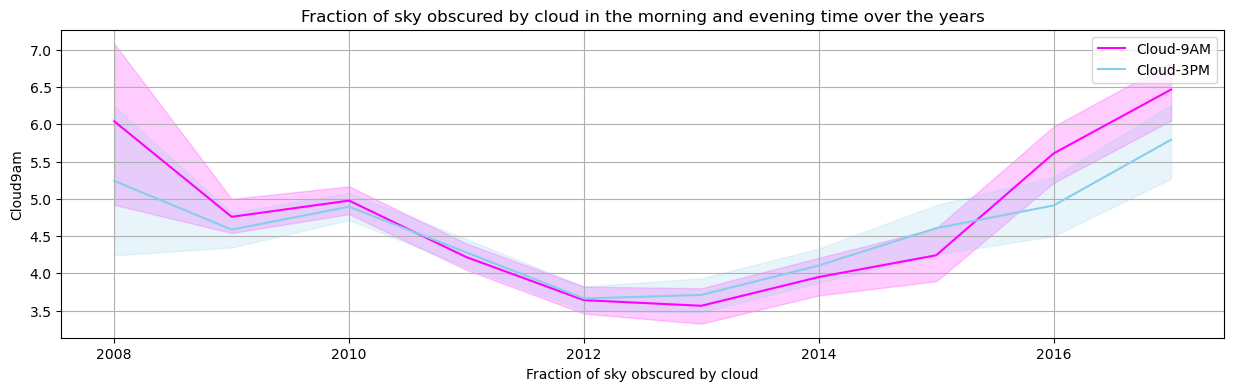

In [142]:
plt.figure(figsize=(15,4))

sns.lineplot(x='year',y='Cloud9am',data=rain_df,color='magenta',label='Cloud-9AM')
sns.lineplot(x='year',y='Cloud3pm',data=rain_df,color='skyblue',label='Cloud-3PM')


plt.title('Fraction of sky obscured by cloud in the morning and evening time over the years')
plt.xlabel('Fraction of sky obscured by cloud')
plt.grid(True)
plt.show()

In [145]:
print(f'Highest cloud cover in the morning recorded was {rain_df["Cloud9am"].max()} % and evening was {rain_df["Cloud3pm"].max()}%')
print(f'Lowest cloud cover in the morning recorded was {rain_df["Cloud9am"].min()} % and evening was {rain_df["Cloud3pm"].min()}%')

Highest cloud cover in the morning recorded was 8.0 % and evening was 8.0%
Lowest cloud cover in the morning recorded was 0.0 % and evening was 0.0%


Observation:    
    
    Clouds are almost similarly covering the sky during morning and evening.
    Fraction of sky obscured by cloud was highest during 2008 and 2016 and lowest during 2012.
    Highest cloud cover in the morning and evening recorded was 8.0 %
    Lowest cloud cover in the morning and evening recorded was 0.0 %

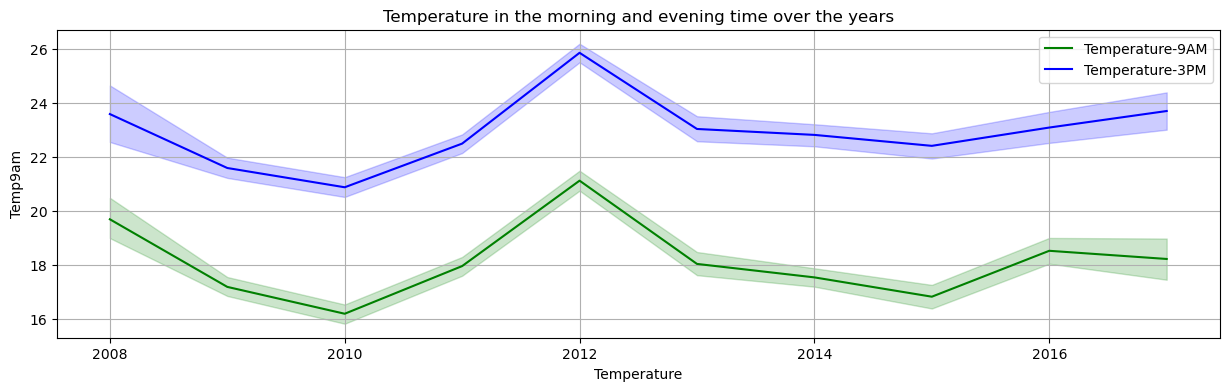

In [148]:
plt.figure(figsize=(15,4))

sns.lineplot(x='year',y='Temp9am',data=rain_df,color='green',label='Temperature-9AM')
sns.lineplot(x='year',y='Temp3pm',data=rain_df,color='blue',label='Temperature-3PM')

plt.title('Temperature in the morning and evening time over the years')
plt.xlabel('Temperature')
plt.grid(True)
plt.show()

In [149]:
print(f'Highest Temperature in the morning recorded was {rain_df["Temp9am"].max()}°C and evening was {rain_df["Temp3pm"].max()}°C')
print(f'Lowest Temperature in the morning recorded was {rain_df["Temp9am"].min()} °C and evening was {rain_df["Temp3pm"].min()}°C')

Highest Temperature in the morning recorded was 39.4°C and evening was 44.1°C
Lowest Temperature in the morning recorded was 1.9 °C and evening was 7.3°C


Observation:    
    
    Temperature is slightly higher in the evening than in the morning time.
    Temperature has been less during 2010 and peaked during 2012
    Highest Temperature in the morning recorded was 39.4°C and evening was 44.1°C
    Lowest Temperature in the morning recorded was 1.9 °C and evening was 7.3°C

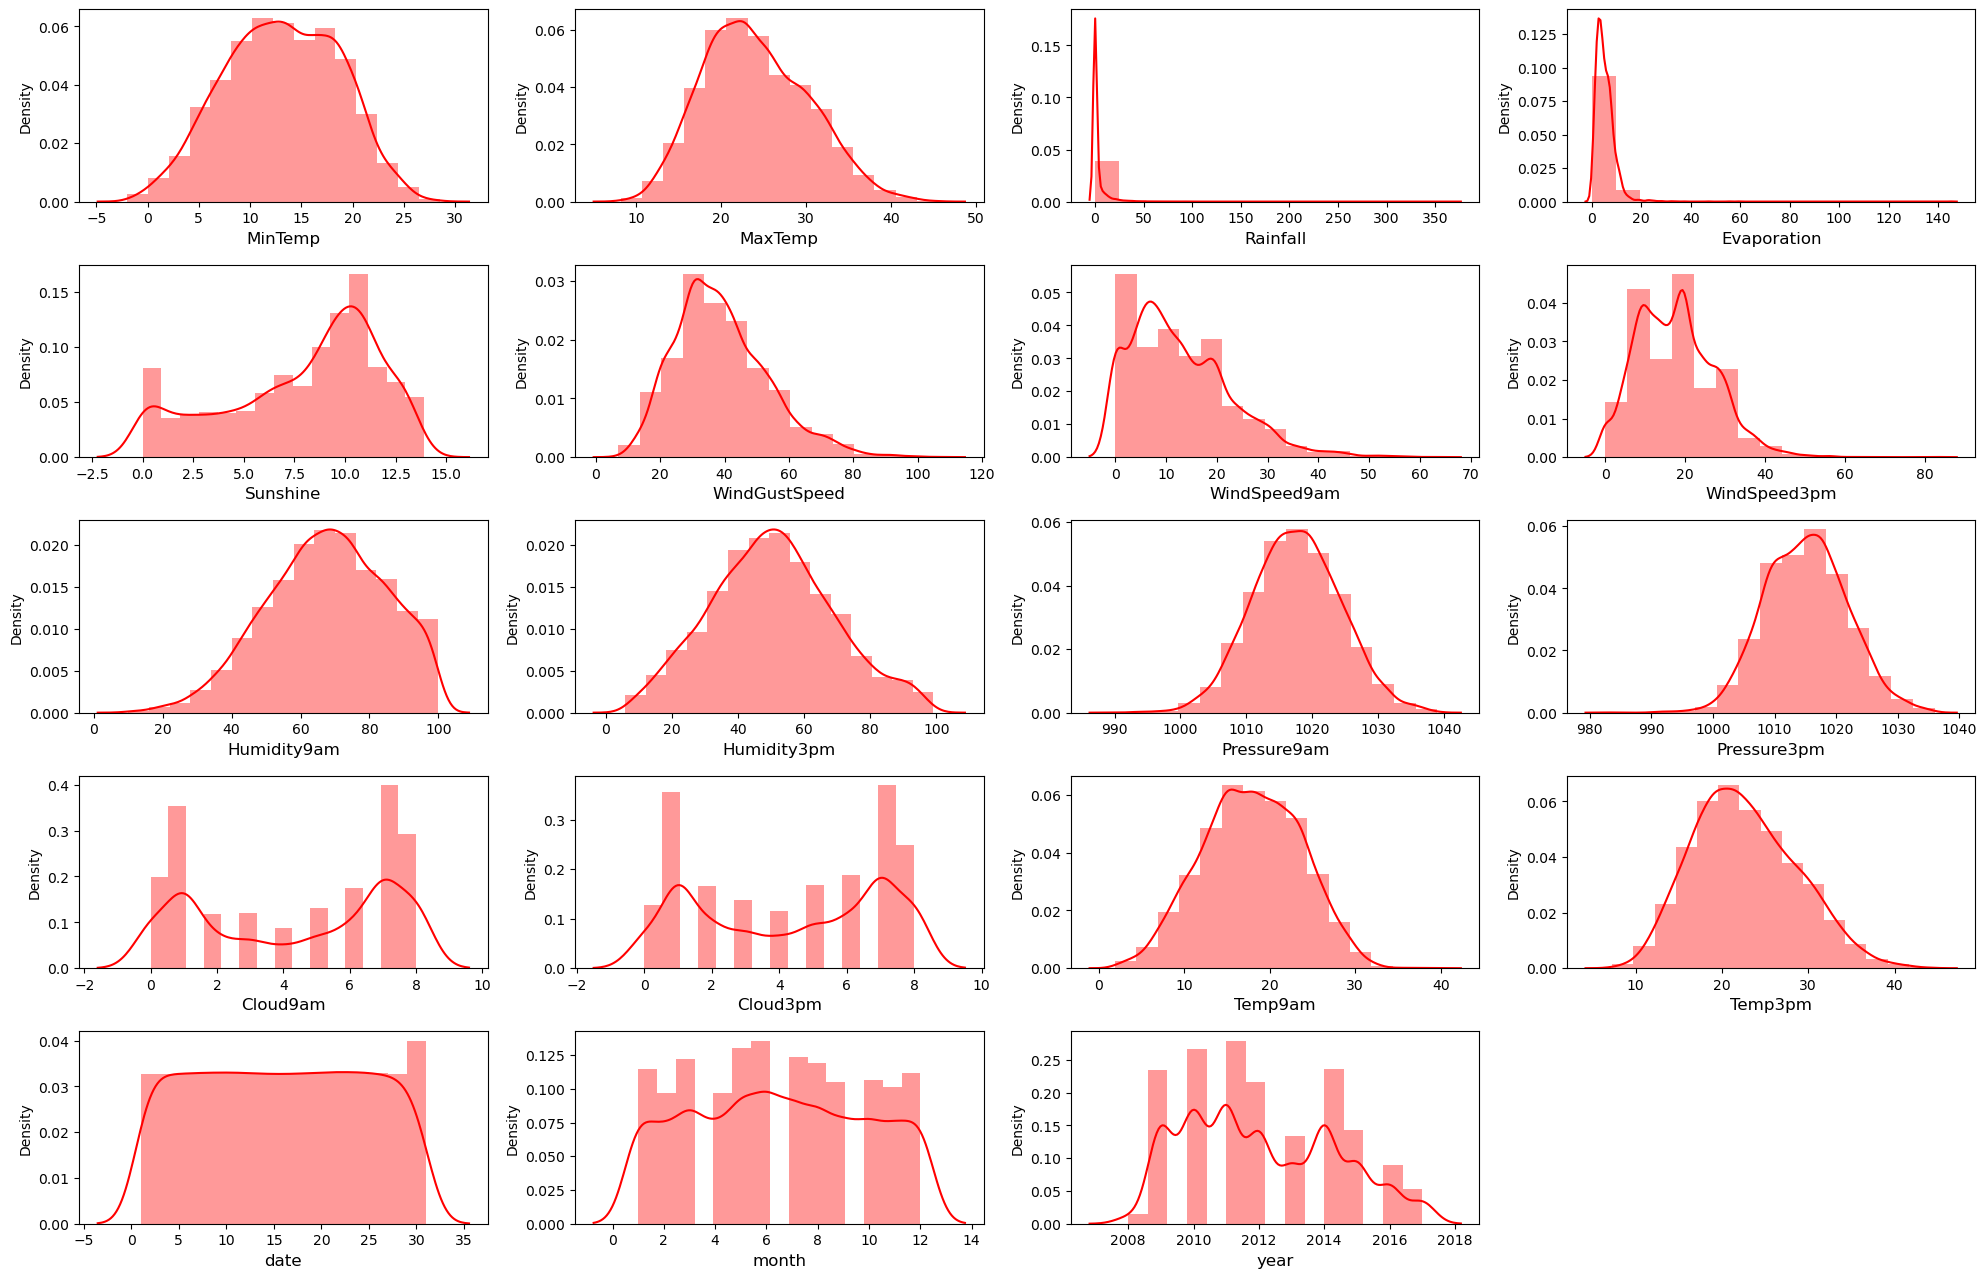

In [150]:
# check data distribution

num=rain_df.select_dtypes(include=['int','float'])

plt.figure(figsize=(20,15))
plot=1
for col in num.columns:
    if plot<=len(num):
        ax=plt.subplot(6,4,plot)
        sns.distplot(rain_df[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

In [151]:
num.skew()

MinTemp          -0.083271
MaxTemp           0.326215
Rainfall         13.510350
Evaporation      10.216570
Sunshine         -0.637137
WindGustSpeed     0.724065
WindSpeed9am      0.952569
WindSpeed3pm      0.545718
Humidity9am      -0.255152
Humidity3pm       0.149786
Pressure9am       0.019836
Pressure3pm       0.038601
Cloud9am         -0.183033
Cloud3pm         -0.137486
Temp9am          -0.047034
Temp3pm           0.345725
date              0.006240
month             0.021988
year              0.354481
dtype: float64

rainfall and evaporation has extreme positive skewness which needs to be handled

In [152]:
for col in ['Rainfall','Evaporation']:
    rain_df[col]=np.log1p(rain_df[col])
    
print(f'Skewness after transformation: \n{rain_df["Rainfall"].skew()}\n{rain_df["Evaporation"].skew()}')

Skewness after transformation: 
1.9261821005409083
-0.06336385648071248


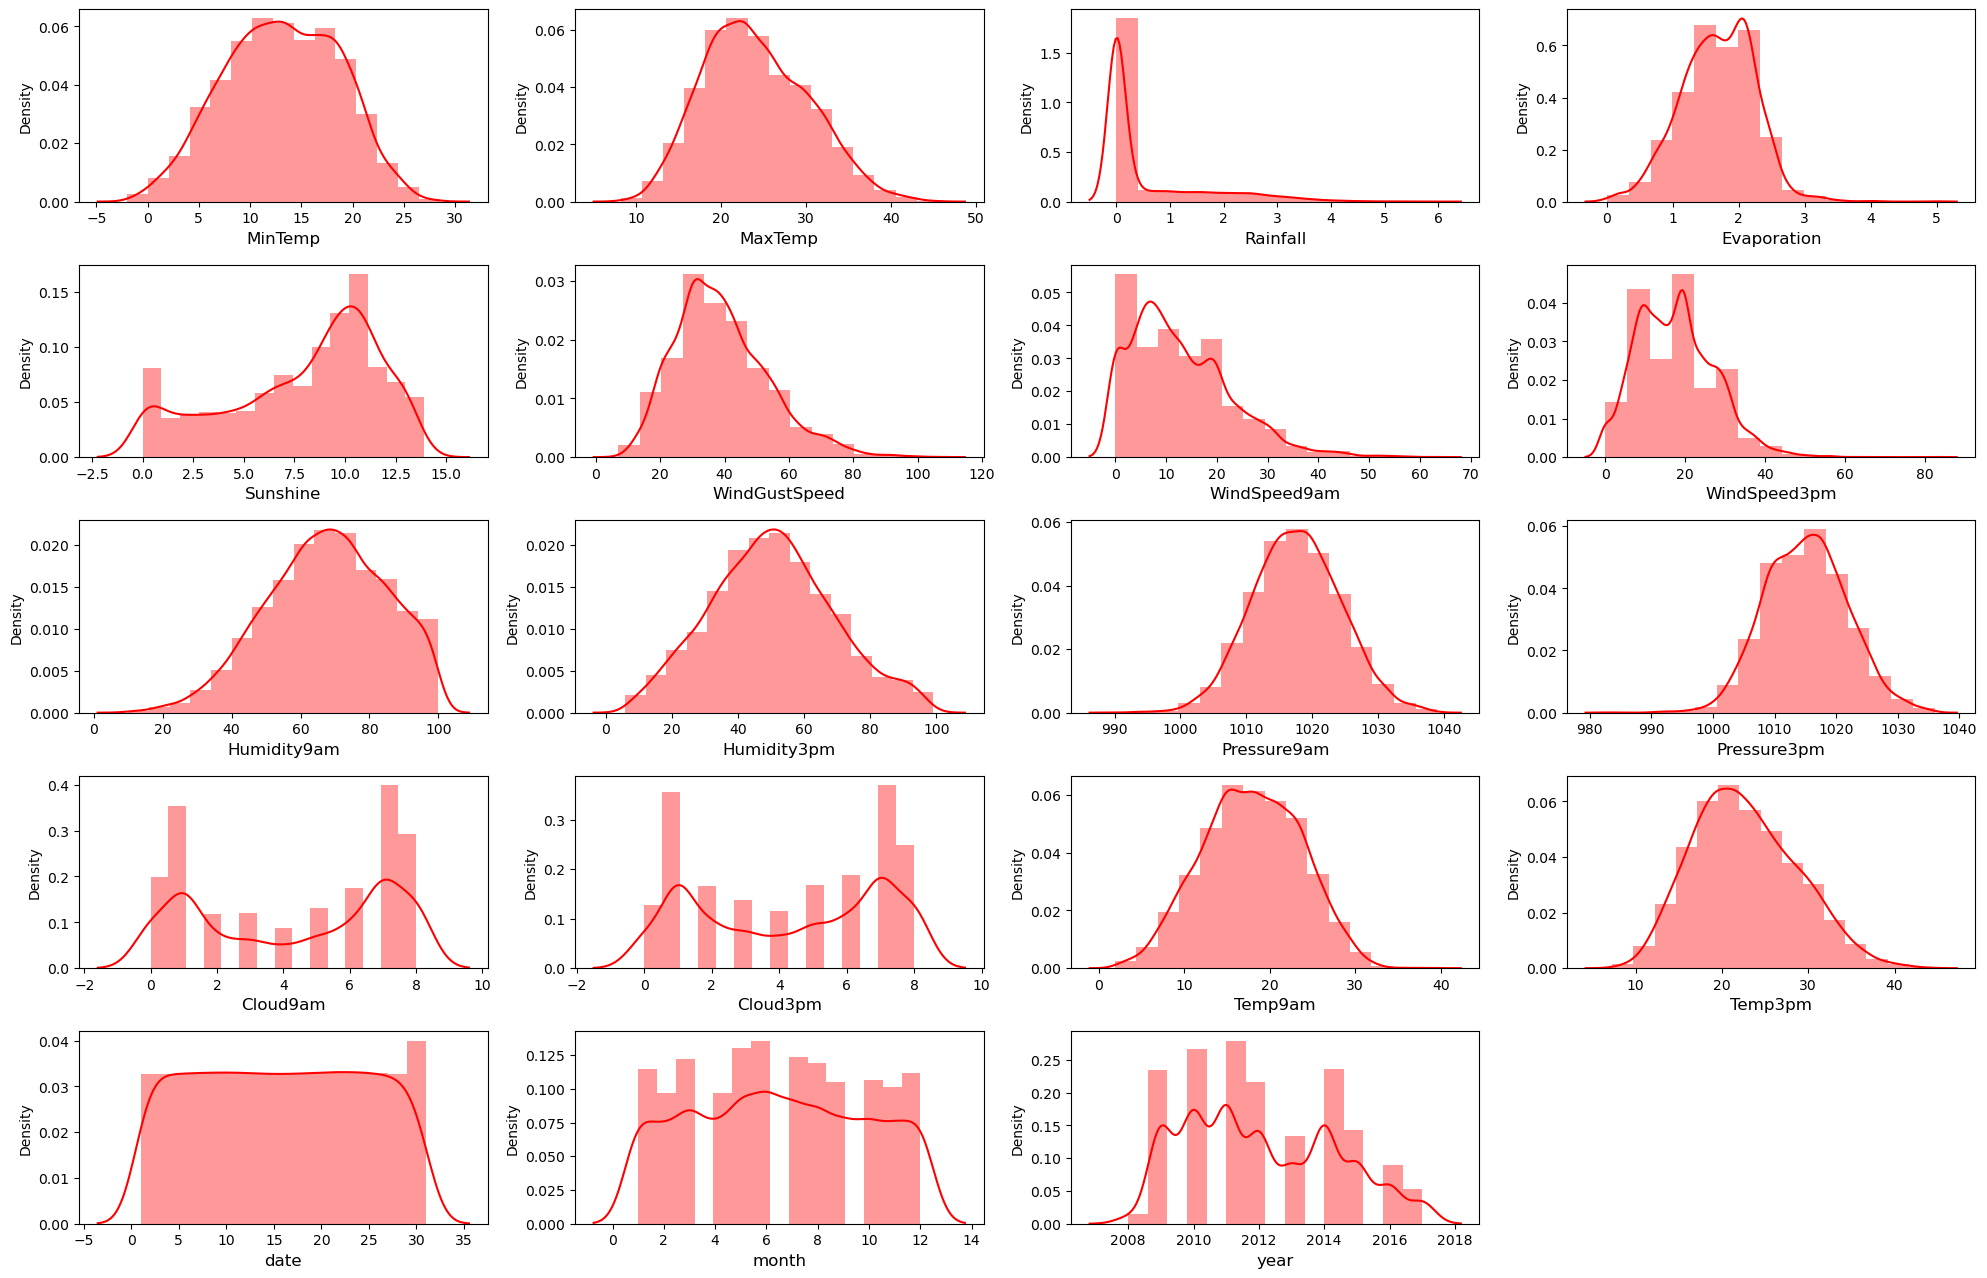

In [153]:
# check data distribution

num=rain_df.select_dtypes(include=['int','float'])

plt.figure(figsize=(20,15))
plot=1
for col in num.columns:
    if plot<=len(num):
        ax=plt.subplot(6,4,plot)
        sns.distplot(rain_df[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

skewness has been reduced

In [154]:
# check for nulls

rain_df.isna().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
date                0
month               0
year                0
dtype: int64

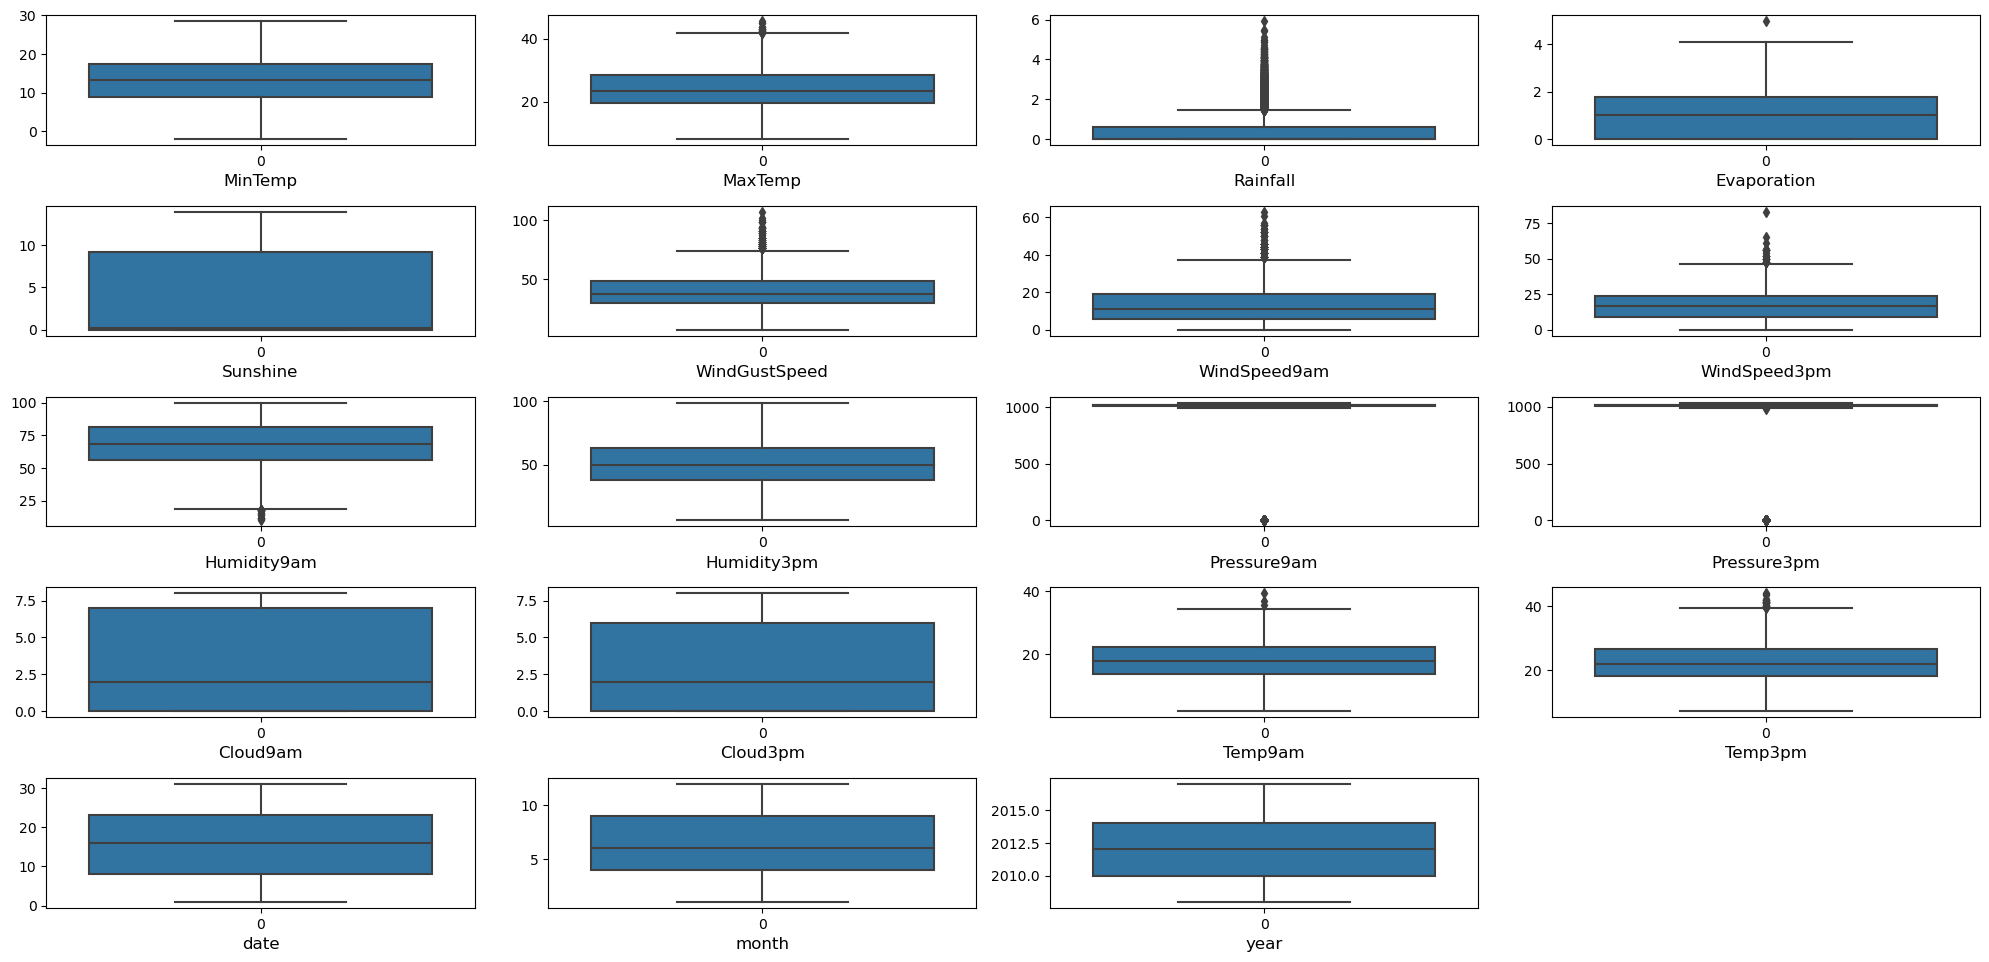

In [162]:
# check for outliers using boxplot

plt.figure(figsize=(20,15))
plot=1
for col in num:
    if plot<=len(num):
        ax=plt.subplot(8,4,plot)
        sns.boxplot(rain_df[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

In [163]:
print('Size of original dataset',rain.shape)
print('Size of dataset after cleaning and pre-processing',rain_df.shape)
print('Number of rows removed after cleaning and pre-processing',rain.shape[0]-rain_df.shape[0])

Size of original dataset (8425, 23)
Size of dataset after cleaning and pre-processing (6762, 26)
Number of rows removed after cleaning and pre-processing 1663


In [164]:
# fill nulls in float/int columns having more than 1000 nulls with 0

rain_df['Sunshine'].fillna(0,inplace=True)
rain_df['Evaporation'].fillna(0,inplace=True)
rain_df['Pressure9am'].fillna(0,inplace=True)
rain_df['Pressure3pm'].fillna(0,inplace=True)
rain_df['Cloud9am'].fillna(0,inplace=True)
rain_df['Cloud3pm'].fillna(0,inplace=True)

In [165]:
rain_df['MinTemp'].fillna(rain_df['MinTemp'].mean(),inplace=True)
rain_df['MaxTemp'].fillna(rain_df['MinTemp'].mean(),inplace=True)
rain_df['Rainfall'].fillna(rain_df['Rainfall'].median(),inplace=True)
rain_df['WindGustDir'].fillna(rain_df['WindGustDir'].mode()[0],inplace=True)
rain_df['WindGustSpeed'].fillna(rain_df['WindGustSpeed'].median(),inplace=True)
rain_df['WindDir9am'].fillna(rain_df['WindDir9am'].mode()[0],inplace=True)
rain_df['WindDir3pm'].fillna(rain_df['WindDir3pm'].mode()[0],inplace=True)
rain_df['WindSpeed9am'].fillna(rain_df['WindSpeed9am'].median(),inplace=True)
rain_df['WindSpeed3pm'].fillna(rain_df['WindSpeed3pm'].median(),inplace=True)
rain_df['Humidity9am'].fillna(rain_df['Humidity9am'].mean(),inplace=True)
rain_df['Humidity3pm'].fillna(rain_df['Humidity3pm'].mean(),inplace=True)
rain_df['Temp9am'].fillna(rain_df['Temp9am'].mean(),inplace=True)
rain_df['Temp3pm'].fillna(rain_df['Temp3pm'].mean(),inplace=True)
rain_df['RainToday'].fillna(rain_df['RainToday'].mode()[0],inplace=True)
rain_df['RainTomorrow'].fillna(rain_df['RainTomorrow'].mode()[0],inplace=True)

In [166]:
# check for nulls

rain_df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
date             0
month            0
year             0
dtype: int64

In [167]:
# create a copy of rain_df before encoding

rain_df1=rain_df.copy()

In [168]:
# encode categorical columns

cat=rain_df1.select_dtypes(include='object')
le=LabelEncoder()
for col in cat.columns:
    rain_df1[col]=le.fit_transform(rain_df1[col])
    
rain_df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,date,month,year
0,2008-12-01,1,13.4,22.9,0.470004,0.0,0.0,13,44.0,13,...,1007.1,8.0,0.0,16.9,21.8,0,0,1,12,2008
1,2008-12-02,1,7.4,25.1,0.000000,0.0,0.0,14,44.0,6,...,1007.8,0.0,0.0,17.2,24.3,0,0,2,12,2008
2,2008-12-03,1,12.9,25.7,0.000000,0.0,0.0,15,46.0,13,...,1008.7,0.0,2.0,21.0,23.2,0,0,3,12,2008
3,2008-12-04,1,9.2,28.0,0.000000,0.0,0.0,4,24.0,9,...,1012.8,0.0,0.0,18.1,26.5,0,0,4,12,2008
4,2008-12-05,1,17.5,32.3,0.693147,0.0,0.0,13,41.0,1,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008


In [175]:
rain_df1.drop('Date',axis=1,inplace=True)

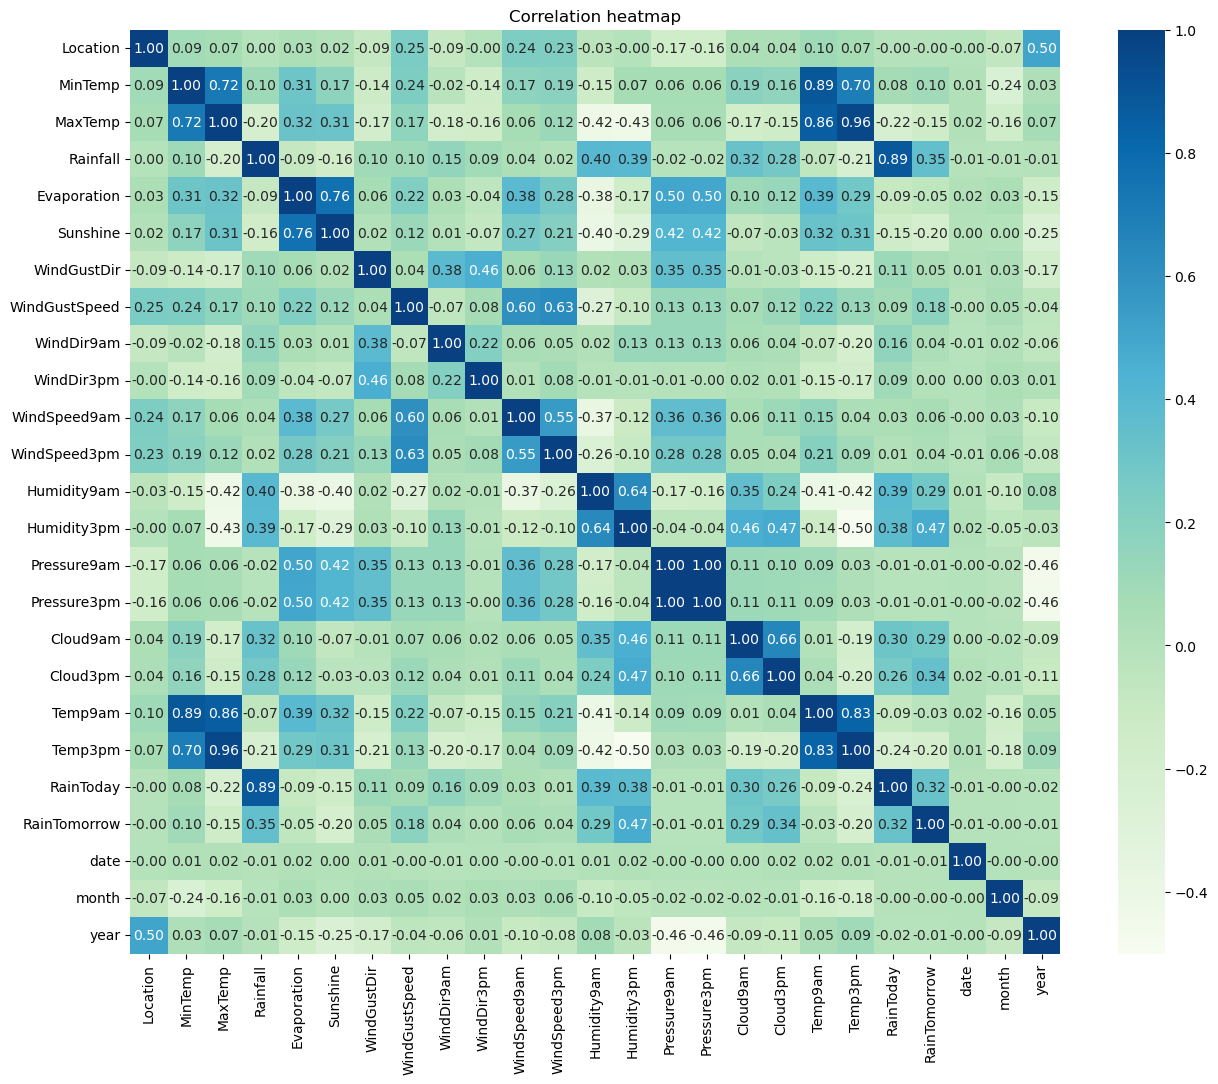

In [176]:
# check for correlation

cm= rain_df1.corr()
plt.figure(figsize=(15,12))

sns.heatmap(cm, annot=True,cmap='GnBu',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

Observation:    
    
   Rainfall:-
   
       High Positive correlation with RainToday= 0.89
       Moderate Positive correlation with humidity, cloud and rain tomorrow
            
   RainTomorrow:-
       
       Moderate Positive correlation with Rainfall, humidity, cloud and rain today
       
   High Multicollinearity exists between:-
   
       Min and max temp with temp at morning and evening 
       Sunshine and evaporation
       WindGustSpeed and wind speed at morning and evening
       Humidity at morning and evening
       
We could use VIF score to eliminate highly correlated features so that multicollinearity is reduced in the dataset

# Feature Selection

# Feature Selection for classification model to forecast whether or not it will rain tomorrow

In [177]:
# confirm multicollinearity by vif for classification Model

x=rain_df1.drop(['RainTomorrow'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
14,Pressure9am,117.725553
15,Pressure3pm,117.129725
19,Temp3pm,24.021789
18,Temp9am,17.977298
2,MaxTemp,16.623904
1,MinTemp,8.670459
13,Humidity3pm,5.530782
3,Rainfall,4.847285
20,RainToday,4.730653
12,Humidity9am,4.172850


we can drop 'Pressure9am','Pressure3pm' ,'Temp3pm','Temp9am' and check vif score again

In [180]:
# confirm multicollinearity by vif for classification Model

x=rain_df1.drop(['RainTomorrow','Pressure9am','Pressure3pm','Temp3pm','Temp9am'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
3,Rainfall,4.838230
2,MaxTemp,4.811709
16,RainToday,4.716810
1,MinTemp,4.221168
4,Evaporation,3.025329
13,Humidity3pm,3.008133
5,Sunshine,2.899692
12,Humidity9am,2.597059
7,WindGustSpeed,2.199114
10,WindSpeed9am,2.162092


Observation:

    VIF scores are below 5, so we can use the features to build the model

In [248]:
X=rain_df1.drop(['RainTomorrow','Pressure9am','Pressure3pm','Temp3pm','Temp9am'],axis=1)
Y=rain_df1['RainTomorrow']

In [249]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,random_state=67)

print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(5071, 20) (5071,) (1691, 20) (1691,)


In [250]:
Y.value_counts()

RainTomorrow
0    5190
1    1572
Name: count, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

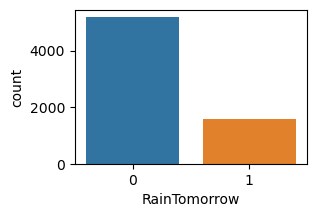

In [252]:
# checking for data imbalance

plt.figure(figsize=(3,2))
sns.countplot(x='RainTomorrow',data=rain_df1)

Observation:  
    There is significant imbalance in the data. Since the dataset is small, we can use oversampling to rectify it.

In [253]:
# oversampling by SMOTE

from imblearn.over_sampling import SMOTE as smt
over=smt(random_state=78,k_neighbors=3,sampling_strategy='auto')
X_train,Y_train=over.fit_resample(X_train,Y_train)

In [254]:
# check label distribution after oversampling
from collections import Counter
print('Label distribution after oversampling: ', Counter(Y_train))

Label distribution after oversampling:  Counter({0: 3893, 1: 3893})


In [255]:
# check shape of train and test sets after oversampling

print('No. of feature data a/f smote: ', X_train.shape,'and no. of label data a/f smote: ', Y_train.shape)

No. of feature data a/f smote:  (7786, 20) and no. of label data a/f smote:  (7786,)


Text(0.5, 1.0, 'Label distribution after oversampling')

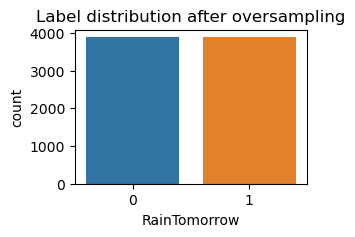

In [256]:
ytrain_df=pd.DataFrame(Y_train,columns=['RainTomorrow'])
plt.figure(figsize=(3,2))
sns.countplot(x='RainTomorrow', data=ytrain_df)
plt.title('Label distribution after oversampling')

Observation:  
    
    Now the dataset is balanced, and can be used for model building

# Feature Selection for regression model to predict how much rainfall could be there

In [191]:
# confirm multicollinearity by vif for classification Model

x=rain_df1.drop(['Rainfall'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
13,Pressure9am,117.724403
14,Pressure3pm,117.131687
18,Temp3pm,24.017066
17,Temp9am,17.983957
2,MaxTemp,16.647264
1,MinTemp,8.673710
12,Humidity3pm,5.823002
11,Humidity9am,4.139486
3,Evaporation,3.330882
4,Sunshine,3.020429


we can drop 'Pressure9am','Pressure3pm' ,'Temp3pm','Temp9am' and check vif score again

In [193]:
# confirm multicollinearity by vif for classification Model

x=rain_df1.drop(['Rainfall','Pressure9am','Pressure3pm','Temp3pm','Temp9am'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
2,MaxTemp,4.835526
1,MinTemp,4.229504
12,Humidity3pm,3.257262
3,Evaporation,3.034474
4,Sunshine,2.935882
11,Humidity9am,2.571270
6,WindGustSpeed,2.284814
9,WindSpeed9am,2.159247
13,Cloud9am,2.085166
14,Cloud3pm,2.025725


Observation:

    VIF scores are below 5, so we can use the features to build the model

In [233]:
x=rain_df1.drop(['Rainfall','Pressure9am','Pressure3pm','Temp3pm','Temp9am'],axis=1)
y=rain_df1['Rainfall']

In [195]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=67)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5071, 20) (5071,) (1691, 20) (1691,)


# MODEL BUILDING & VALIDATION

# MODEL BUILDING & VALIDATION for classification model to forecast whether or not it will rain tomorrow¶

In [257]:
# define functions for training and evaluation of models

def score(model,X_train,Y_train,X_test,Y_test,train=True):
    if train:
        Y_pred1= model.predict(X_train)
        print('Accuracy of train set: ',accuracy_score(Y_train,Y_pred1))
    else:
        Y_pred2= model.predict(X_test)
        print('Accuracy of test set: ',accuracy_score(Y_test,Y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(Y_test,Y_pred2,digits=2)}')
        
        plt.figure(figsize=(4,3))
        cnf_matrix=metrics.confusion_matrix(Y_test,Y_pred2)
        cnf_df=pd.DataFrame(cnf_matrix)
        sns.heatmap(cnf_df, annot=True, annot_kws={'size':12},cmap='cividis',fmt='g')
        plt.title(f'Confusion matrix for {model} model')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,X,Y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')

Accuracy of train set:  0.7843565373747753
Accuracy of test set:  0.7853341218214075

Classification report of LogisticRegression() model  :

               precision    recall  f1-score   support

           0       0.91      0.79      0.85      1297
           1       0.53      0.75      0.62       394

    accuracy                           0.79      1691
   macro avg       0.72      0.77      0.74      1691
weighted avg       0.82      0.79      0.80      1691



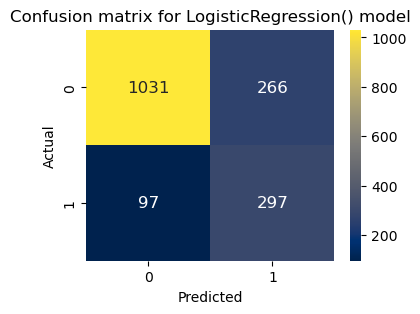


Cross validation score of the LogisticRegression() model : 0.8163236856951679


In [258]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,X_test,Y_test,train=True)
score(lr,X_train,Y_train,X_test,Y_test,train=False)

cv(lr)

Accuracy of train set:  0.8963524274338557
Accuracy of test set:  0.7545830869308102

Classification report of KNeighborsClassifier() model  :

               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1297
           1       0.48      0.72      0.58       394

    accuracy                           0.75      1691
   macro avg       0.69      0.74      0.70      1691
weighted avg       0.80      0.75      0.77      1691



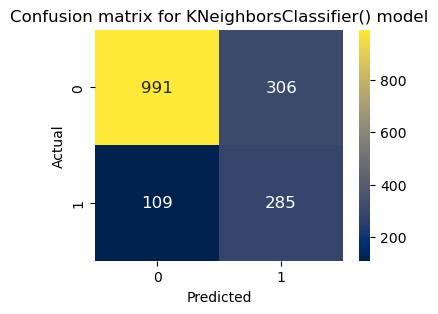


Cross validation score of the KNeighborsClassifier() model : nan


In [259]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
score(knn,X_train,Y_train,X_test,Y_test,train=True)
score(knn,X_train,Y_train,X_test,Y_test,train=False)
cv(knn)

Accuracy of train set:  1.0
Accuracy of test set:  0.7670017740981667

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           0       0.86      0.83      0.85      1297
           1       0.50      0.55      0.52       394

    accuracy                           0.77      1691
   macro avg       0.68      0.69      0.68      1691
weighted avg       0.78      0.77      0.77      1691



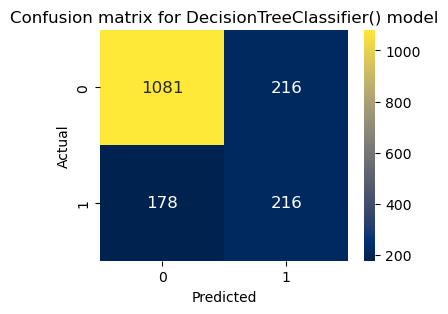


Cross validation score of the DecisionTreeClassifier() model : 0.7099991471942693


In [260]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

score(dt,X_train,Y_train,X_test,Y_test,train=True)
score(dt,X_train,Y_train,X_test,Y_test,train=False)
cv(dt)

Accuracy of train set:  1.0
Accuracy of test set:  0.8350088704908338

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           0       0.88      0.91      0.89      1297
           1       0.66      0.60      0.63       394

    accuracy                           0.84      1691
   macro avg       0.77      0.75      0.76      1691
weighted avg       0.83      0.84      0.83      1691



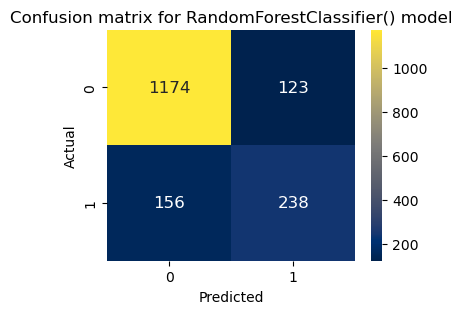


Cross validation score of the RandomForestClassifier() model : 0.7939869542589993


In [261]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,X_test,Y_test,train=True)
score(rf,X_train,Y_train,X_test,Y_test,train=False)
cv(rf)

Accuracy of train set:  0.8841510403287953
Accuracy of test set:  0.8013010053222945

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           0       0.90      0.83      0.87      1297
           1       0.56      0.69      0.62       394

    accuracy                           0.80      1691
   macro avg       0.73      0.76      0.74      1691
weighted avg       0.82      0.80      0.81      1691



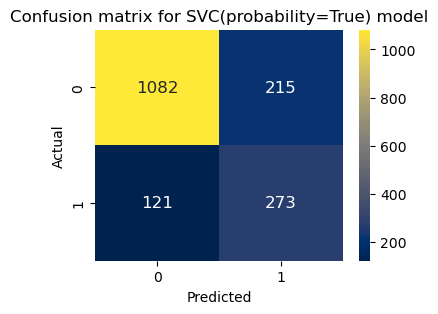


Cross validation score of the SVC(probability=True) model : 0.7675245017646518


In [262]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,X_test,Y_test,train=True)
score(svc,X_train,Y_train,X_test,Y_test,train=False)
cv(svc)

Accuracy of train set:  0.8835088620601079
Accuracy of test set:  0.8255470136014192

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1297
           1       0.62      0.67      0.64       394

    accuracy                           0.83      1691
   macro avg       0.76      0.77      0.76      1691
weighted avg       0.83      0.83      0.83      1691



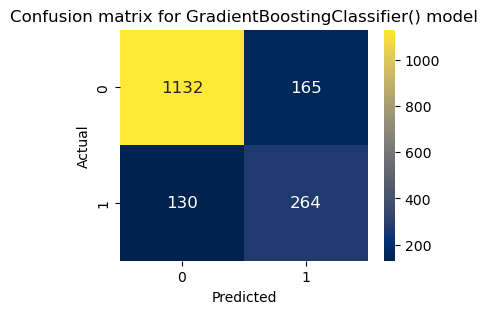


Cross validation score of the GradientBoostingClassifier() model : 0.7868897518991328


In [273]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,X_test,Y_test,train=True)
score(gbc,X_train,Y_train,X_test,Y_test,train=False)
cv(gbc)

Accuracy of train set:  0.9971744156177755
Accuracy of test set:  0.846836191602602

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model  :

               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1297
           1  

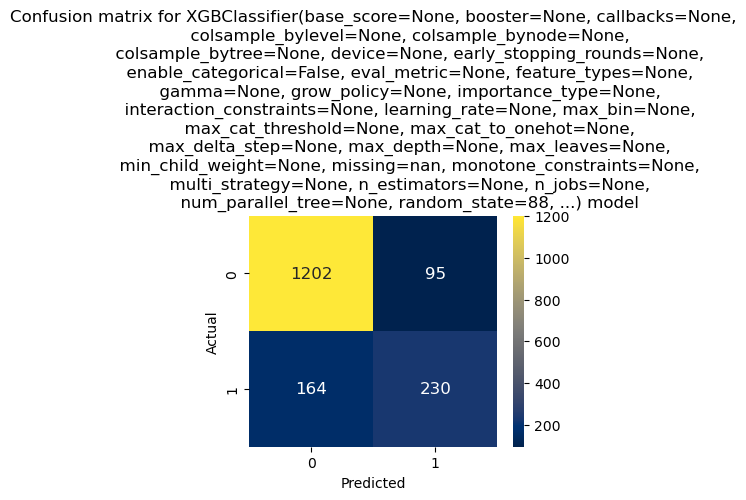


Cross validation score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model : 0.7584943824155832


In [264]:
# XGBoost
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=88)
xg.fit(X_train,Y_train)

score(xg,X_train,Y_train,X_test,Y_test,train=True)
score(xg,X_train,Y_train,X_test,Y_test,train=False)
cv(xg)

Observations:  

    All models can easily classify whether there will be rain tomorrow or not.  
    As there are instances of false negatives, we can use 'precision-recall-curve' to find the better model which classifies  more correctly. 

F1 score of Logistic Regression model is  0.6206896551724138
F1 score of KNN model is  0.5786802030456853
F1 score of Decision Tree model is  0.5138055222088835
F1 score of Random Forest model is  0.6438896189224703
F1 score of SVC model is  0.6190476190476191
F1 score of Gradient Boosting model is  0.6423357664233577
F1 score of XGBoost model is  0.6397774687065368


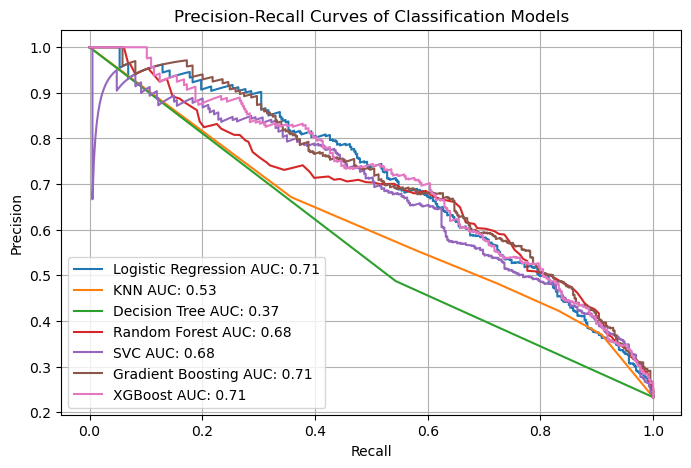

In [265]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Logistic Regression': lr,'KNN': knn,'Decision Tree': dt, 'Random Forest': rf,'SVC': svc,
          'Gradient Boosting': gbc,'XGBoost': xg}


def pr_curve(data,X_test,Y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        Y_prob=model.predict_proba(X_test)[:,1]
        fs=f1_score(Y_test,Y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(Y_test,Y_prob)
        aps=average_precision_score(Y_test,Y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,X_test,Y_test)

Observations:  
    
    Gradient Boost (gbc) model is selected as the best model on account of highest AUC and F1 score. Comparitively higher F1 score also tells us that the model has less false positives and false negatives than the others with good test and train accuracy. The closer values of test and train accuracy indicates less overfitting.   
    The gbc model has the following score metrics:
    
        Accuracy of train set:  0.88
        Accuracy of test set:  0.83
        Cross validation score : 0.78
        F1 score: 0.64
        AUC: 0.71

In [267]:
# Hyperparameter tuning of the selected Gradient Boost (gbc) model using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators': [50,100,150,200,250],'learning_rate': [0.001,0.01,0.1,1],'max_depth': [2,3,4,5],
    'min_samples_split': [2,3,4,5],'min_samples_leaf': [1,2,4],}

rs=RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=params,scoring='accuracy',cv=5)

rs.fit(X_train,Y_train)

print(f'Best parameters for Random Forest model: {rs.best_params_} and best score is : {rs.best_score_}')

Best parameters for Random Forest model: {'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.1} and best score is : 0.8845560609545858


Accuracy of train set:  0.9528641150783458
Accuracy of test set:  0.8456534594914252

Classification report of GradientBoostingClassifier(max_depth=4, min_samples_split=5, n_estimators=250) model  :

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      1297
           1       0.69      0.61      0.65       394

    accuracy                           0.85      1691
   macro avg       0.79      0.76      0.77      1691
weighted avg       0.84      0.85      0.84      1691



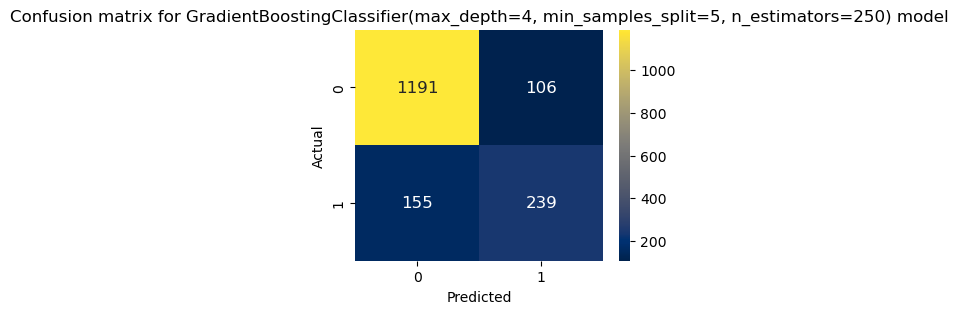


Cross validation score of the GradientBoostingClassifier(max_depth=4, min_samples_split=5, n_estimators=250) model : 0.756428405865554


In [279]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc1=rs.best_estimator_
gbc1.fit(X_train,Y_train)

score(gbc1,X_train,Y_train,X_test,Y_test,train=True)
score(gbc1,X_train,Y_train,X_test,Y_test,train=False)
cv(gbc1)

F1 score of Gradient Boosting model is  0.6423357664233577
F1 score of Tuned Gradient Boosting model is  0.6468200270635994


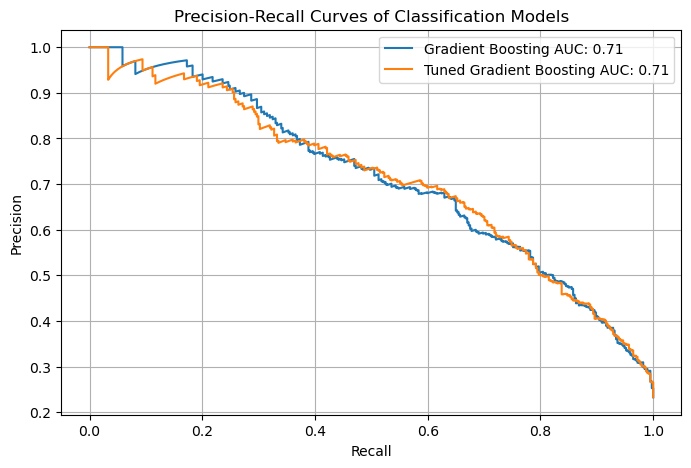

In [280]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Gradient Boosting': gbc,'Tuned Gradient Boosting': gbc1}


def pr_curve(data,X_test,Y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        Y_pred=model.predict(X_test)
        Y_prob=model.predict_proba(X_test)[:,1]
        fs=f1_score(Y_test,Y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(Y_test,Y_prob)
        aps=average_precision_score(Y_test,Y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,X_test,Y_test)

Observation:  

    Even though there has been improvement in test accuracy and F1 score, the CV score of the model has reduced after hyperparameter tuning. Tuned model also classified more false negatives. So we'll proceed with the untuned Gradient Boost model having:
    
        Accuracy of train set:  0.88
        Accuracy of test set:  0.83
        Cross validation score : 0.78
        F1 score: 0.64
        AUC: 0.71

        There is minimal overfitting in the untuned Gradient Boost model and the number of False Negatives are also lesser.

In [281]:
# Save model

pickle.dump(gbc, open('Rain_tmrw_prediction_gbc_model.pkl','wb'))

# MODEL BUILDING & VALIDATION for regression model to predict how much rainfall could be there¶

In [286]:
# define functions for training and preliminary evaluation of models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score(model,x_train,y_train,x_test,y_test,train=True):
    model_metrics=[]
    if train:
        y_pred1= model.predict(x_train)
    else:
        y_pred2= model.predict(x_test)
        r2=r2_score(y_test,y_pred2)
        cv=cross_val_score(model,x_scaled,y,cv=5).mean()
        print('R2 score: ',r2_score(y_test,y_pred2))


In [287]:
# linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
score(lr,x_train,y_train,x_test,y_test,train=True)
score(lr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7956609354229016


In [288]:
# Lasso

from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
score(lasso,x_train,y_train,x_test,y_test,train=True)
score(lasso,x_train,y_train,x_test,y_test,train=False)

R2 score:  -0.0012321694923969062


In [289]:
# Ridge

from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
score(ridge,x_train,y_train,x_test,y_test,train=True)
score(ridge,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7956620308461197


In [290]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
score(dtr,x_train,y_train,x_test,y_test,train=True)
score(dtr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.6519617907292294


In [291]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
score(rfr,x_train,y_train,x_test,y_test,train=True)
score(rfr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8113855558525437


In [292]:
# XGBoost

import xgboost as xgb
xgbr=xgb.XGBRegressor(random_state=55)
xgbr.fit(x_train,y_train)

score(xgbr,x_train,y_train,x_test,y_test,train=True)
score(xgbr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.7830286623485698


In [293]:
# SVM

from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
score(svr,x_train,y_train,x_test,y_test,train=True)
score(svr,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8047520593051327


In [294]:
# Evaluate the models based on metrics

def evaluation(model):
    model_metrics=[]
    for name, model in models.items():
        model.fit(x_train,y_train)
        
        y_train_pred= model.predict(x_train)
        tr=r2_score(y_train,y_train_pred)

        y_test_pred= model.predict(x_test)
        ts=r2_score(y_test,y_test_pred)
        
        mse=mean_squared_error(y_test,y_test_pred)
        mae=mean_absolute_error(y_test,y_test_pred)
        cv=cross_val_score(model,x,y,cv=5).mean()
        diff = abs(ts-cv)
        model_metrics.append({'Model':name, 'Train R2 score':tr,'Test R2 score':ts, 'Mean Squared Error':mse,
                              'Mean Absolute Error':mae, 'Cross Validation':cv,'Diff btw R2 and CV': diff})
        models_table=pd.DataFrame(model_metrics)
    return models_table.sort_values(by='Test R2 score' ,ascending=False)

In [295]:
models={'Linear Regression':lr, 'Lasso':lasso, 'Ridge':ridge,'Decision Tree':dtr, 'Random Forest':rfr,'XGBoost':xgbr,'SVM':svr }

evaluation(models)

,Model,Train R2 score,Test R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
4,Random Forest,0.973406,0.809624,0.168208,0.210351,0.802059,0.007566
6,SVM,0.849930,0.804752,0.172513,0.227134,-0.086162,0.890914
2,Ridge,0.793847,0.795662,0.180545,0.236158,0.791756,0.003906
0,Linear Regression,0.793847,0.795661,0.180546,0.236132,0.791774,0.003887
5,XGBoost,0.992123,0.783029,0.191707,0.228146,0.768743,0.014286
3,Decision Tree,1.000000,0.633692,0.323655,0.259983,0.617724,0.015968
1,Lasso,0.000000,-0.001232,0.884649,0.714740,0.210797,0.212029


Observation:

    We can select Random Forest model as it has the highest test r2 score of 0.80 and cross-validation of 0.80.  MSE and MAE is also lesser.

In [296]:
# Hyperparameter tuning of the selected model (Random Forest) using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

params={'n_estimators': [50,100,150,200,250], 'max_depth':range(1,30,5), 
        'min_samples_leaf':[1,2,4], 'max_leaf_nodes':[10,15,20]}

rs=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=params,scoring='accuracy',cv=5)

rs.fit(x_train,y_train)

print(f'Best parameters for Random Forest model: {rs.best_params_} and best score is : {rs.best_score_}')

Best parameters for Random Forest model: {'n_estimators': 250, 'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_depth': 21} and best score is : nan


In [299]:
# Tuned Random Forest model 

rf1=rs.best_estimator_

rf1.fit(x_train,y_train)

score(rf1,x_train,y_train,x_test,y_test,train=True)
score(rf1,x_train,y_train,x_test,y_test,train=False)

R2 score:  0.8124120016232745


In [306]:
# compare tuned model with untuned one

models={'Random Forest':rfr,'Tuned Random Forest ':rf1}

evaluation(models)

,Model,Train R2 score,Test R2 score,Mean Squared Error,Mean Absolute Error,Cross Validation,Diff btw R2 and CV
1,Tuned Random Forest,0.845470,0.811633,0.166433,0.212044,0.805502,0.006131
0,Random Forest,0.972693,0.810930,0.167055,0.209138,0.803301,0.007629


Observation:

    Hyperparameter tuning has slightly improved the test r2 score and cv score and slightly reduced the errors. Overfitting has reduced significantly after tuning. The selected Random Forest model has the following metrics:

       * Test R2 score: 0.845
       * Train R2 score: 0.811
       * Cross Validation: 0.805
       * MSE: 0.166
       * MAE: 0.212

In [307]:
# Save Random Forest model

pickle.dump(rf1, open('Rainfall_prediction_rf1_model.pkl','wb'))

# Overall Summary

The dataset on "Rainfall Weather Forecasting" was used to analyse and build machine learning models to :  
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow  
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there  


Actions done with the dataset:  
1. Data cleaning - removal of unwanted columns, outlier removal, managing skewness; Number of rows removed after cleaning and pre-processing is 1663
2. Exploratory Data Analysis - descriptive and graphical analysis of data
3. Feature Engineering - creation of new columns such as year, month and location co-ordinates for data analysis and modelling purpose; scaling of data
4. Model training and evaluation- trained 7 models each for the regression and classification problems; evaluated the models using appropriate metrics to find the best model


# Data Insights

DESCRIPTIVE ANALYSIS:

    Majority rainfall data is from PerthAirport location in Australia
    Rainfall was 0.0mm in 4334 observations
    Number of hours of bright sunshine was 0 in 119 observations
    Min temp recorded ranged from -2 to 28.5°C
    Max temp recorded ranged from 8.2 to 45.5°C
    Average rainfall is 2.78mm
    Class A pan evaporation (mm) in the 24 hours ranged from 0-145mm
    Average of 7.89hrs of sunshine was recieved



INFERENTIAL ANALYSIS:
    
    Over the years, maximum temperature was recorded on February and March of 2012 and minimum on August 2010
    Highest temp was recorded in 2017-02-11 at Williamtown [45.5°C] with no rainfall  
    Lowest temp was recorded in June of 2009 and 2010 at Albury [-2.0°C] with no rainfall
    Temperature is slightly higher in the evening than in the morning time.
    Temperature has been less during 2010 and peaked during 2012
    Highest Temperature in the morning recorded was 39.4°C and evening was 44.1°C
    Lowest Temperature in the morning recorded was 1.9 °C and evening was 7.3°C
    
    
    Highest Rainfall was recorded in 2009-11-07 at CoffsHarbour [45.5°C] with 371 mm rainfall  
    Lowest Rainfall [0.0 mm] was recorded in Uluru
    
    
    Common wind direction in the morning is to the north-west.
    Common wind directions in the evening is to the south-east, north-west and east-southeast.
    
    
    Wind speed is highest in the evening than in the morning time.
    Wind speed is high during Nov, Dec and Jan
    Wind speed is low during June
    Highest wind speed in the morning recorded was 63.0 km/hr and evening was 83.0km/hr
    Lowest wind speed recorded was 0.0 km/hr in morning and evening
    
    
    Humidity is highest in the morning than in the evening time.
    Humidity is high during June and low during Dec-Jan
    Highest Humidity in the morning recorded was 100.0 % and evening was 99.0%
    Lowest Humidity in the morning recorded was 10.0 % and evening was 6.0%
    
    
    Atmospheric Pressure is slightly higher in the morning than in the evening time.
    Atmospheric Pressure has increased over the years from 2018-2016 with a slight drop during 2012
    Highest Atmospheric Pressurein the morning recorded was 1039.0 hpa and evening was 1039.0hpa
    Lowest Atmospheric Pressure in the morning recorded was 982.9 hpa and evening was 982.9hpa
    
    
    Clouds are almost similarly covering the sky during morning and evening.
    Fraction of sky obscured by cloud was highest during 2008 and 2016 and lowest during 2012.
    Highest cloud cover in the morning and evening recorded was 8.0 %
    Lowest cloud cover in the morning and evening recorded was 0.0 %
    
    
    The correlations have revealed that certain weather conditions like rainfall, humidity and cloud cover are correlated often occuring together. 
    Daily wind speed and temperatures are consistent and correltaed.
    Sunshine influences evaporation rate.
    

# Selected classification models



* Predict whether or not it will rain tomorrow (classification model)

    Gradient Boost was found to be the best model for the classification task to predict whether or not it will rain tomorrow with 83% test accuracy score. It has the highest accuracy score  and cross-validation score.  MSE and MAE is also lesser. There is minimal overfitting in the untuned Gradient Boost model and the number of False Negatives are also lesser.
    
    
    * Accuracy of train set:  0.88
    * Accuracy of test set:  0.83
    * Cross validation score : 0.78
    * F1 score: 0.64
    * AUC: 0.71
  
  
  
* Predict how much rainfall could be there (regression model)

    Random Forest model was found to be the best model for the regression task to predict how much rainfall could be there with 81% test r2 score. It has the highest r2 score and cross-validation score.  MSE and MAE is also lesser. Overfitting has reduced significantly after tuning. 
    
    
   * Test R2 score: 0.845
   * Train R2 score: 0.811
   * Cross Validation: 0.805
   * MSE: 0.166
   * MAE: 0.212
